# Let us visualize the model prediction result

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/train.csv')
test = pd.read_csv('/home/frenk/Documenti/Artificial Intelligence/UCI_HAR_Dataset/test.csv')

In [3]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [4]:
features = []
for col in X_train.columns:
    features.append(col)

In [5]:
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [6]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.0009793253536452668, max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0009793253536452668, class_weight=None,
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

/home/frenk/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


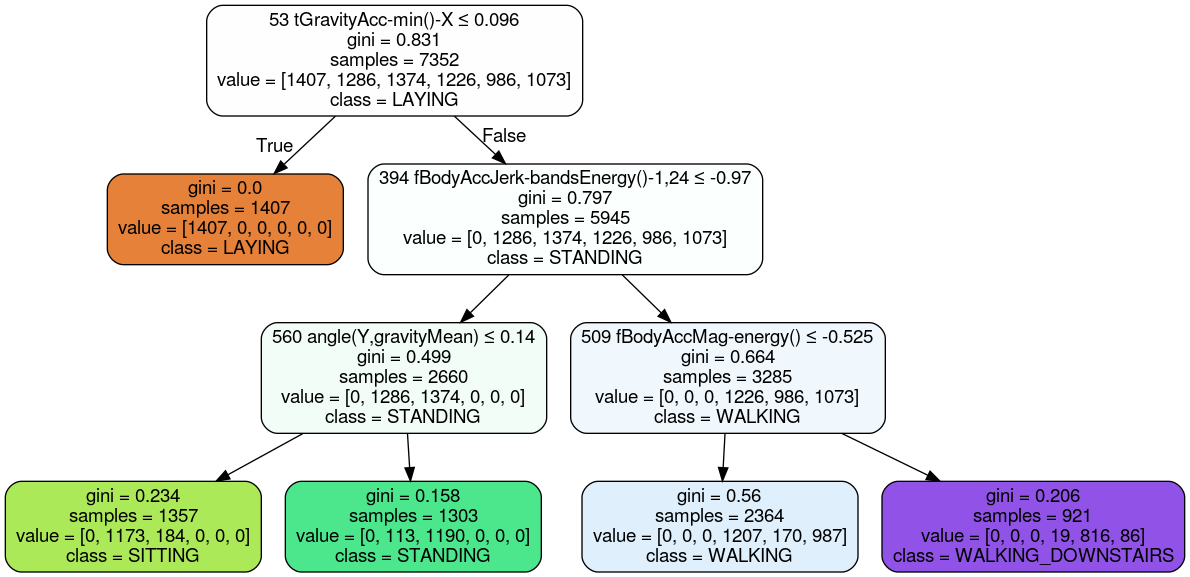

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=labels)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())